In [6]:
import matplotlib.pyplot as plt
import numpy as np

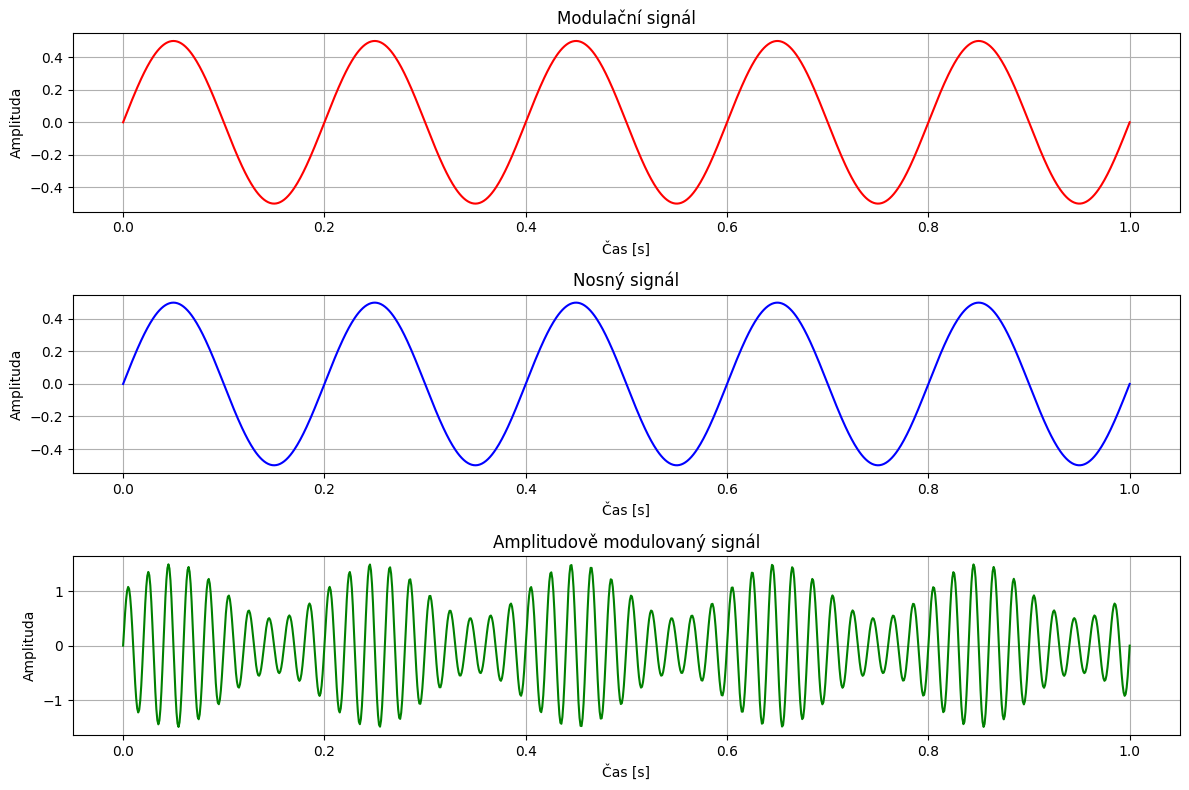

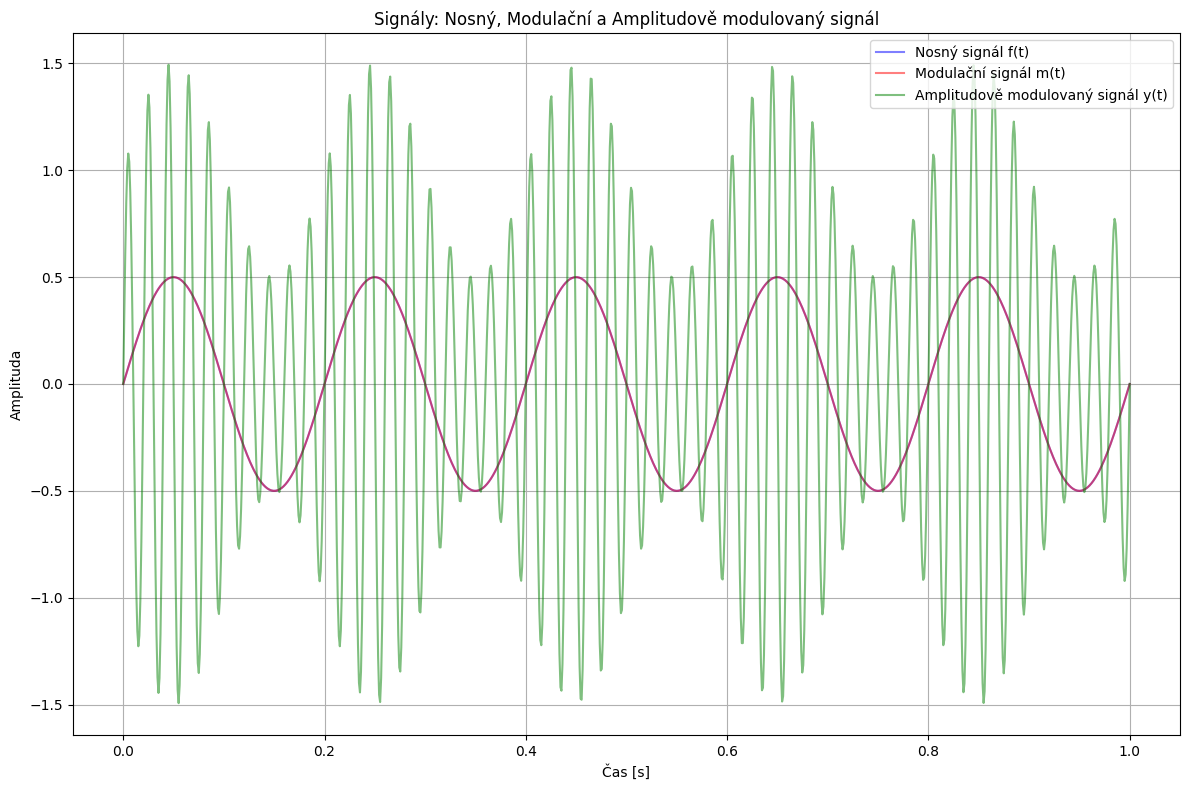

In [20]:
A0 = 1  # Amplituda nosného signálu
M = 0.5  # Amplituda modulačního signálu
f_nosny = 50  # Frekvence nosného signálu
f = 5  # Frekvence modulačního signálu
t = np.linspace(0, 1, 1000)  # Časový vektor (1 sekunda, 1000 bodů)

# Nosný signál f(t) = A0 * sin(ωt)
signal = A0 * np.sin(2 * np.pi * f_nosny * t)

# Modulační signál m(t) = M * sin(φt)
signal = M * np.sin(2 * np.pi * f * t)

# Amplitudová modulace y(t) = (A0 + M * sin(φt)) * sin(ωt)
modulovany_signal = (A0 + signal) * np.sin(2 * np.pi * f_nosny * t)

# Vykreslení signálů
plt.figure(figsize=(12, 8))

# Vykreslení modulačního signálu
plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Modulační signál (m(t))", color="r")
plt.title("Modulační signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

# Vykreslení nosného signálu
plt.subplot(3, 1, 2)
plt.plot(t, signal, label="Nosný signál (f(t))", color="b")
plt.title("Nosný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

# Vykreslení modulovaného signálu
plt.subplot(3, 1, 3)
plt.plot(t, modulovany_signal, label="Amplitudově modulovaný signál (y(t))", color="g")
plt.title("Amplitudově modulovaný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.tight_layout()

# Vykreslení všech signálů
plt.figure(figsize=(12, 8))
plt.plot(t, signal, label="Nosný signál f(t)", color="b", alpha=0.5)
plt.plot(t, signal, label="Modulační signál m(t)", color="r", alpha=0.5)
plt.plot(
    t,
    modulovany_signal,
    label="Amplitudově modulovaný signál y(t)",
    color="g",
    alpha=0.5,
)
plt.title("Signály: Nosný, Modulační a Amplitudově modulovaný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [21]:
def nosna_vlna(A0, f, tvec):
    x = A0 * np.sin(2 * np.pi * f * tvec)
    return np.array(x)


def modulacni_vlna(M, phi, tvec):
    m = M * np.sin(2 * np.pi * phi * tvec)
    return np.array(m)


numT = 10

f = 2
A0 = 1
T = 1 / f
Tmax = numT * T
n_length = 5000
tvecx = np.linspace(0, Tmax, n_length)

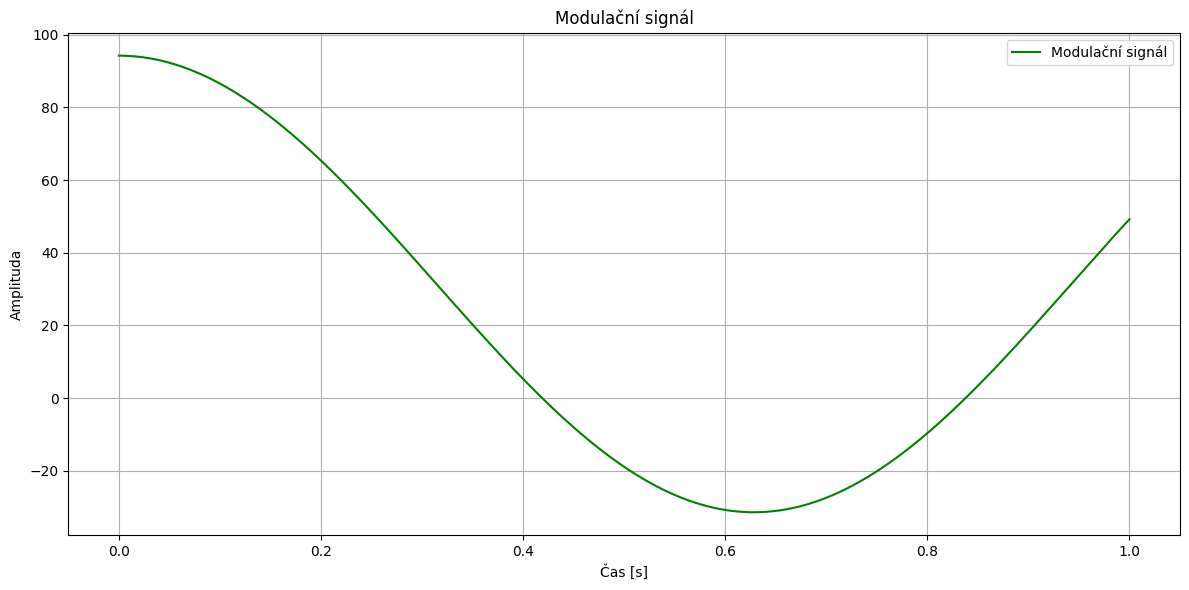

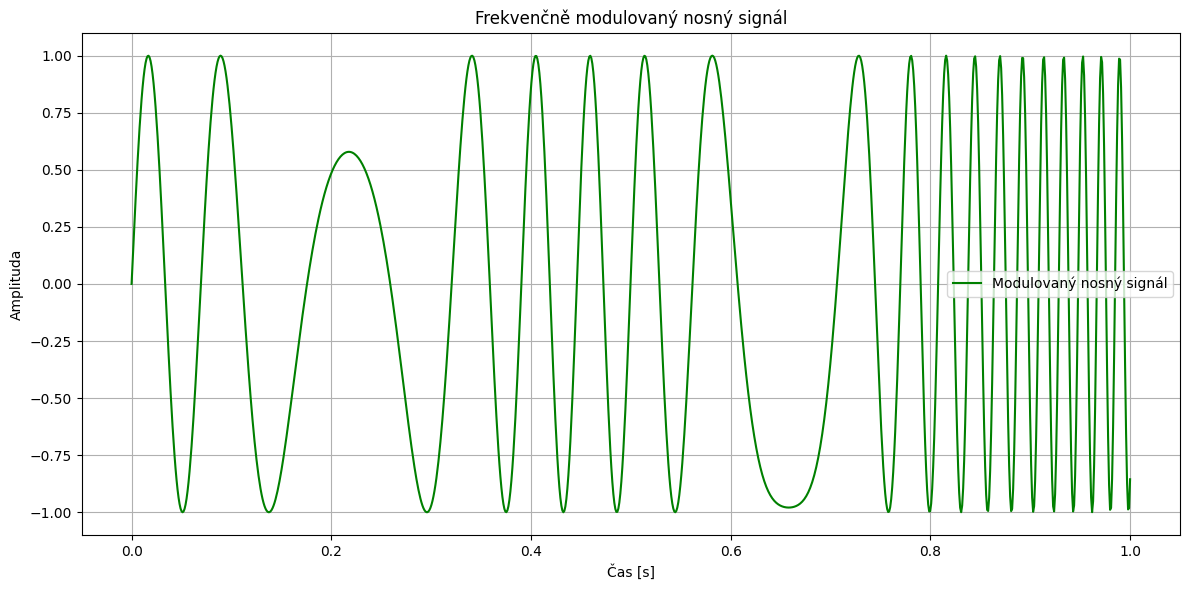

In [22]:
# Frekvenční modulace (FM)
# - v klasickém pojetí je ω konstantní
# - zde je ω dána rovnicí
# - zachovává amplitudu, ale měníme frekvenci

# Amplitodová modulace
# - mění amplitudu, ale respektuje frekvenci

A0 = 1  # Amplituda nosného signálu
M = 0.5  # Amplituda modulačního signálu
f_nosny = 50  # Frekvence nosného signálu
f_modulacni = 5  # Frekvence modulačního signálu
t = np.linspace(0, 1, 1000)  # Časový vektor (1 sekunda, 1000 bodů)


# Modulační signál ω(t) = ω + Δω * cos(φt)
def modulacni_signal(f, t):
    omega = 2 * np.pi * f
    signal = omega + (2 * np.pi * 10) * np.cos(f * t)
    return signal


# Modulovaný nosný signál f(t) = A0 * sin(ω(t)t)
def modulovany_nosny_signal(A0, modulacni_signal, t):
    signal = A0 * np.sin(modulacni_signal * t)
    return signal


signal_modulacni = modulacni_signal(f_modulacni, t)
signal_modulovany_nosny = modulovany_nosny_signal(A0, signal_modulacni, t)

plt.figure(figsize=(12, 6))
plt.plot(t, signal_modulacni, label="Modulační signál", color="g")
plt.title("Modulační signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t, signal_modulovany_nosny, label="Modulovaný nosný signál", color="g")
plt.title("Frekvenčně modulovaný nosný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Konvoluce
# - konvoluční jádro (kernel), které se posouvá po signálu
# - počítám, jaký je průnik/obsah těch dvou křivek

# Jak vygeneruju pomocí sin a cos obdelníkový a pilový signál? možná lze zjistit z interní reprezentace funkce sawtooth?

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

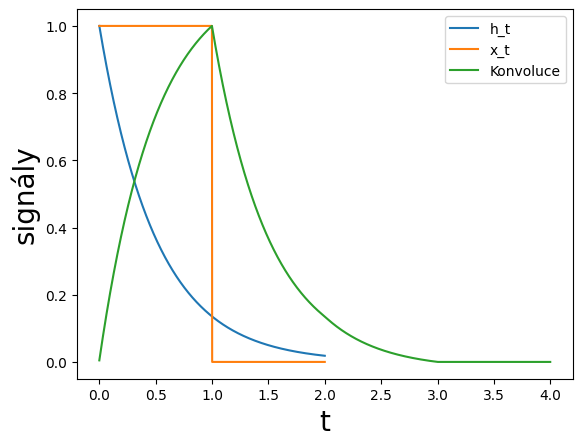

In [24]:
def kernel(alpha, tvec, a):
    h_t = alpha * np.exp(-a * tvec)
    return np.array(h_t)


n_length = 1000
tvec = np.linspace(0, 2, n_length, endpoint=True)
h_t = kernel(1.0, tvec, 2.0)  # Konvoluční jádro

x_t = signal.square(2 * np.pi * 0.5 * tvec)  # Funkce
x_t = np.where(tvec >= 1.0, 0, x_t)  # Odstranění peaku

plt.plot(tvec, h_t, label="h_t")
plt.plot(tvec, x_t, label="x_t")

# Konvoluce
Conv = np.convolve(x_t, h_t, mode="full")

# Přeškálování funkce
Conv = Conv / np.max(Conv)

t_Conv = np.linspace(0, 4, np.max(Conv.shape))

plt.plot(t_Conv, Conv, label="Konvoluce")
plt.xlabel("t", fontsize=20)
plt.ylabel("signály", fontsize=20)
plt.legend(loc="upper right")

plt.show()

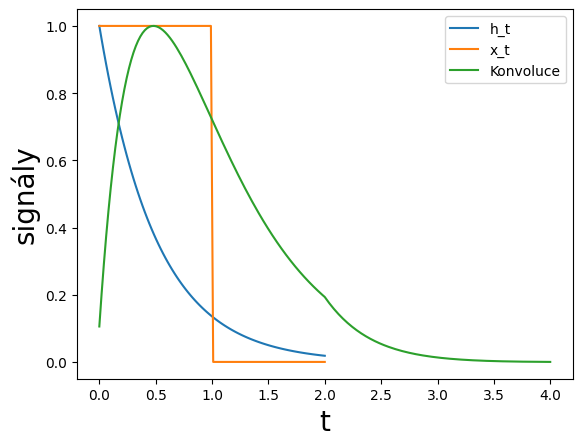

In [25]:
def kernel(alpha, tvec, a):
    h_t = alpha * np.exp(-a * tvec)
    return np.array(h_t)


n_length = 100
tvec = np.linspace(0, 2, n_length, endpoint=True)
h_t = kernel(1.0, tvec, 2.0)  # Konvoluční jádro

x_t = signal.square(2 * np.pi * 0.5 * tvec)  # Funkce
x_t = np.where(tvec >= 1.0, 0, x_t)  # Odstranění peaku

plt.plot(tvec, h_t, label="h_t")
plt.plot(tvec, x_t, label="x_t")

# Konvoluce (ZDE JSEM DAL STEJNOU FUNKCI)
Conv = np.convolve(h_t, h_t, mode="full")

# Přeškálování funkce
Conv = Conv / np.max(Conv)

t_Conv = np.linspace(0, 4, np.max(Conv.shape))

plt.plot(t_Conv, Conv, label="Konvoluce")
plt.xlabel("t", fontsize=20)
plt.ylabel("signály", fontsize=20)
plt.legend(loc="upper right")

plt.show()

(-2.0, 2.0)

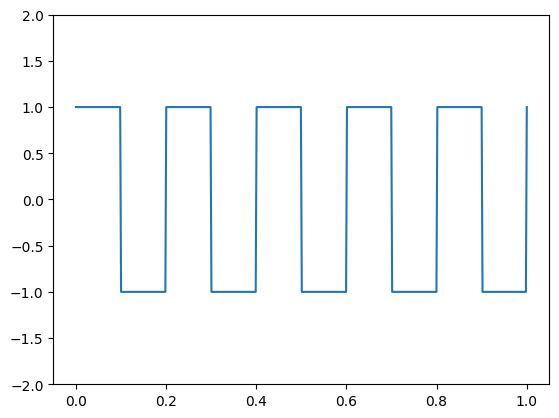

In [26]:
t = np.linspace(0, 1, 500, endpoint=True)
x_t = signal.square(2 * np.pi * 5 * t)
plt.plot(t, x_t)
plt.ylim(-2, 2)

(-2.0, 2.0)

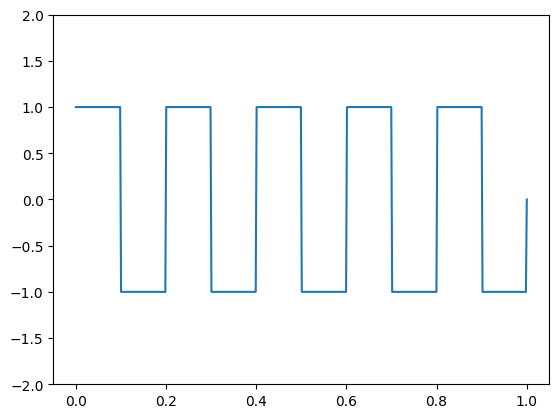

In [27]:
t = np.linspace(0, 1, 500, endpoint=True)
x_t = signal.square(2 * np.pi * 5 * t)
x_t = np.where(t >= 1.0, 0, x_t)
plt.plot(t, x_t)
plt.ylim(-2, 2)

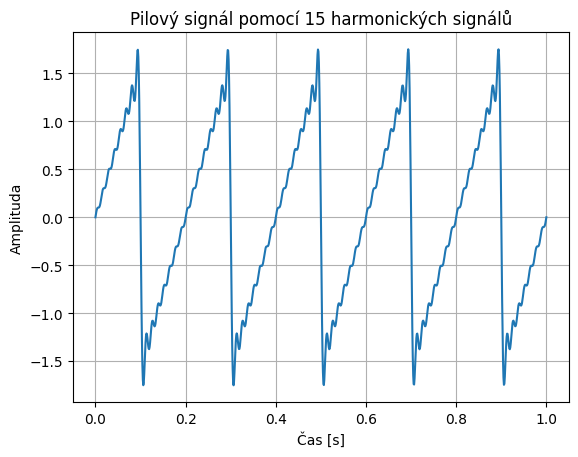

In [28]:
f = 5
t = np.linspace(0, 1, 1000)
signal = np.zeros_like(t)

# https://www.quora.com/How-does-a-sine-wave-lead-to-a-square-wave-and-a-sawtooth-wave

num_harmonics = 15
for k in range(1, num_harmonics + 1):
    signal += (-1) ** (k + 1) * (1 / k) * np.sin(2 * np.pi * k * f * t)

plt.plot(t, signal)
plt.title(f"Pilový signál pomocí {num_harmonics} harmonických signálů")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

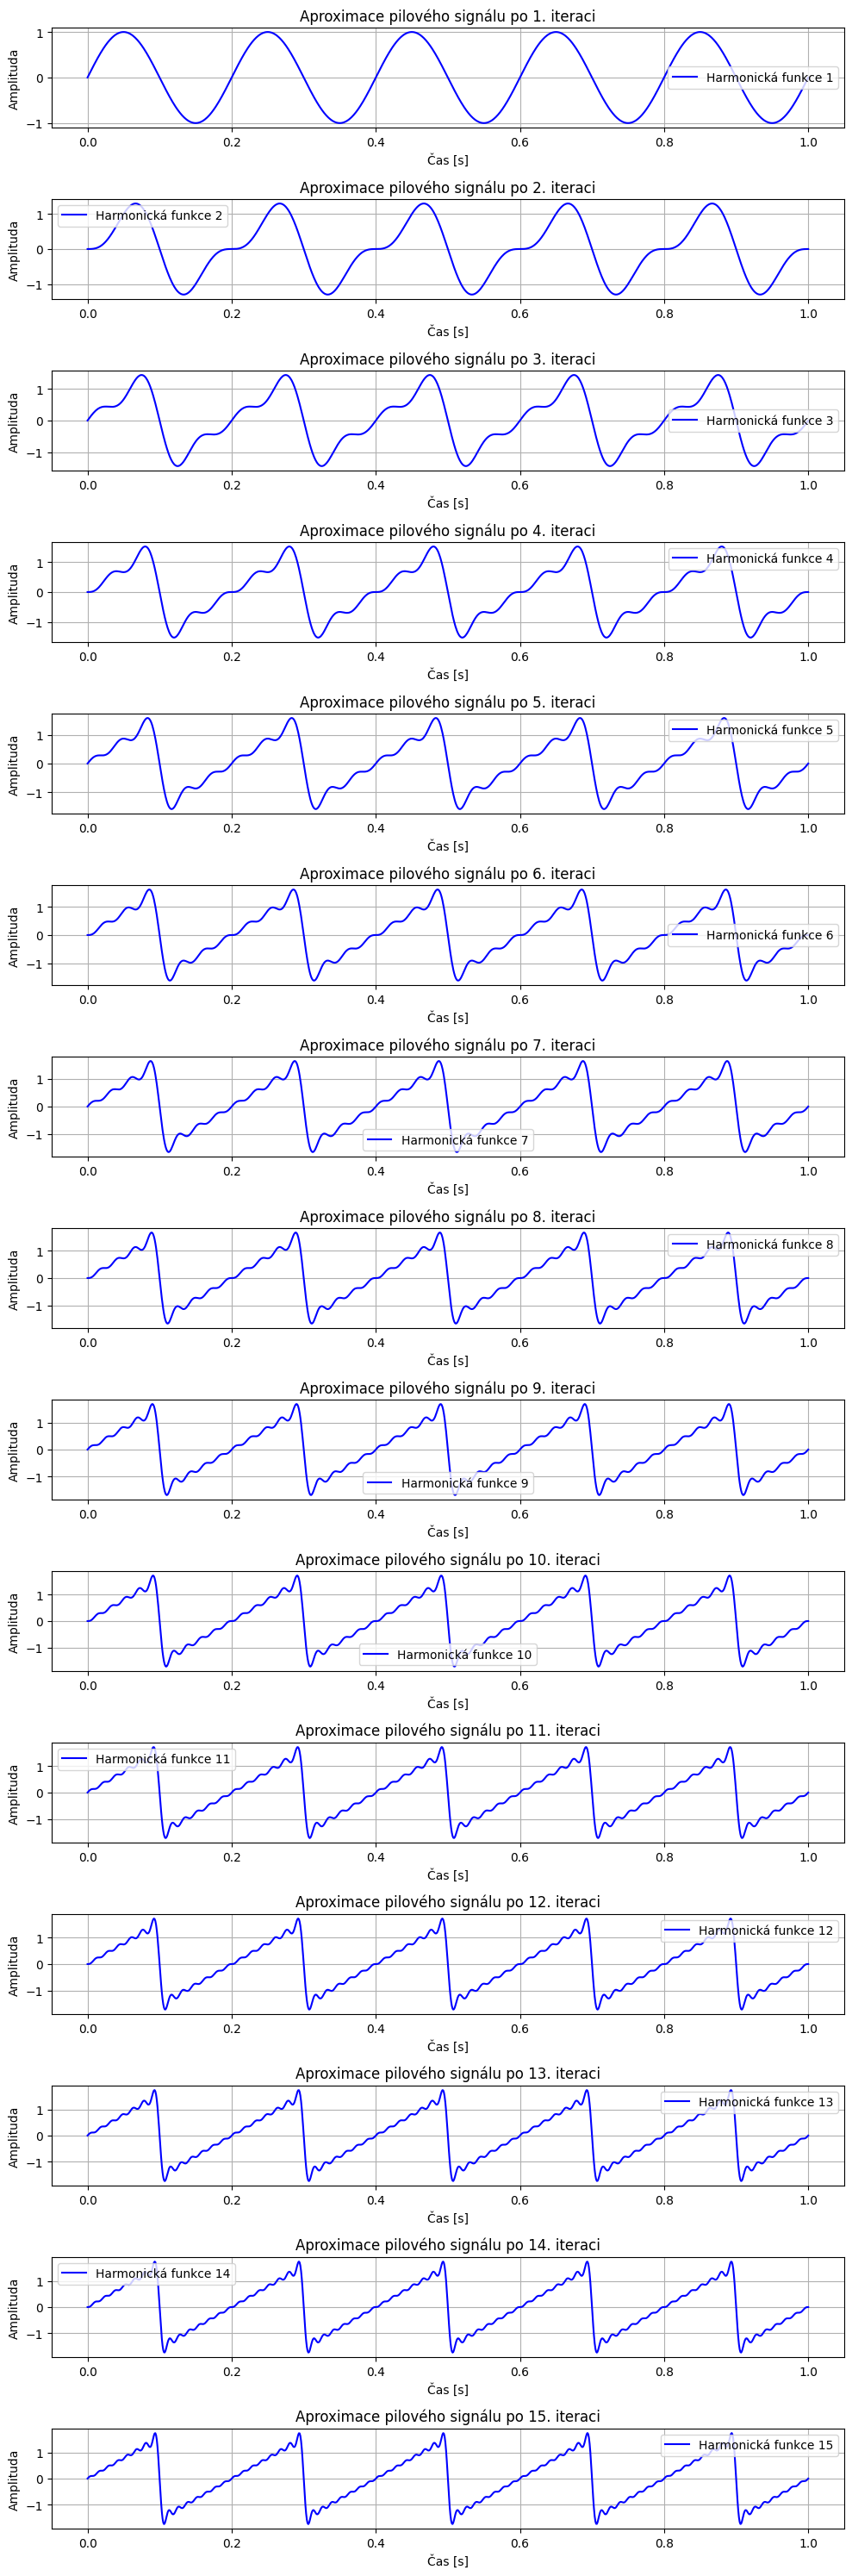

In [29]:
f = 5
t = np.linspace(0, 1, 1000)
signal = np.zeros_like(t)

num_harmonics = 15
fig, axs = plt.subplots(num_harmonics, 1, figsize=(10, 2 * num_harmonics))

for k in range(1, num_harmonics + 1):
    signal += (-1) ** (k + 1) * (1 / k) * np.sin(2 * np.pi * k * f * t)
    axs[k - 1].plot(t, signal, label=f"Harmonická funkce {k}", color="b")
    axs[k - 1].set_title(f"Aproximace pilového signálu po {k}. iteraci")
    axs[k - 1].set_xlabel("Čas [s]")
    axs[k - 1].set_ylabel("Amplituda")
    axs[k - 1].grid(True)
    axs[k - 1].legend()

plt.tight_layout()
plt.show()

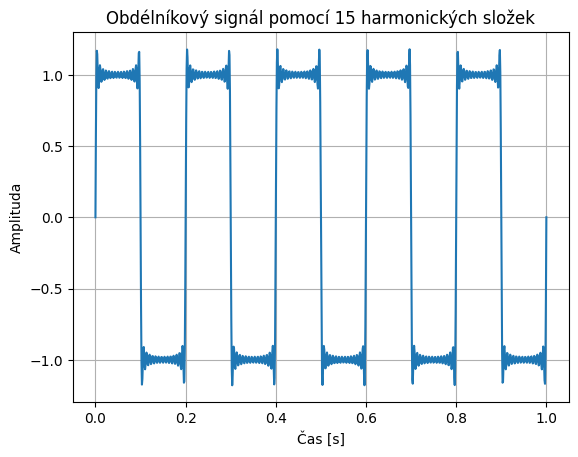

In [30]:
# https://cs.wikipedia.org/wiki/Obd%C3%A9ln%C3%ADkov%C3%BD_pr%C5%AFb%C4%9Bh

f = 5
t = np.linspace(0, 1, 1000)
signal = np.zeros_like(t)

num_harmonics = 15
for k in range(1, num_harmonics + 1):
    # 2k - 1 - liché
    signal += (4 / np.pi) * (np.sin(2 * np.pi * (2 * k - 1) * f * t) / (2 * k - 1))

plt.plot(t, signal)
plt.title(f"Obdélníkový signál pomocí {num_harmonics} harmonických složek")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

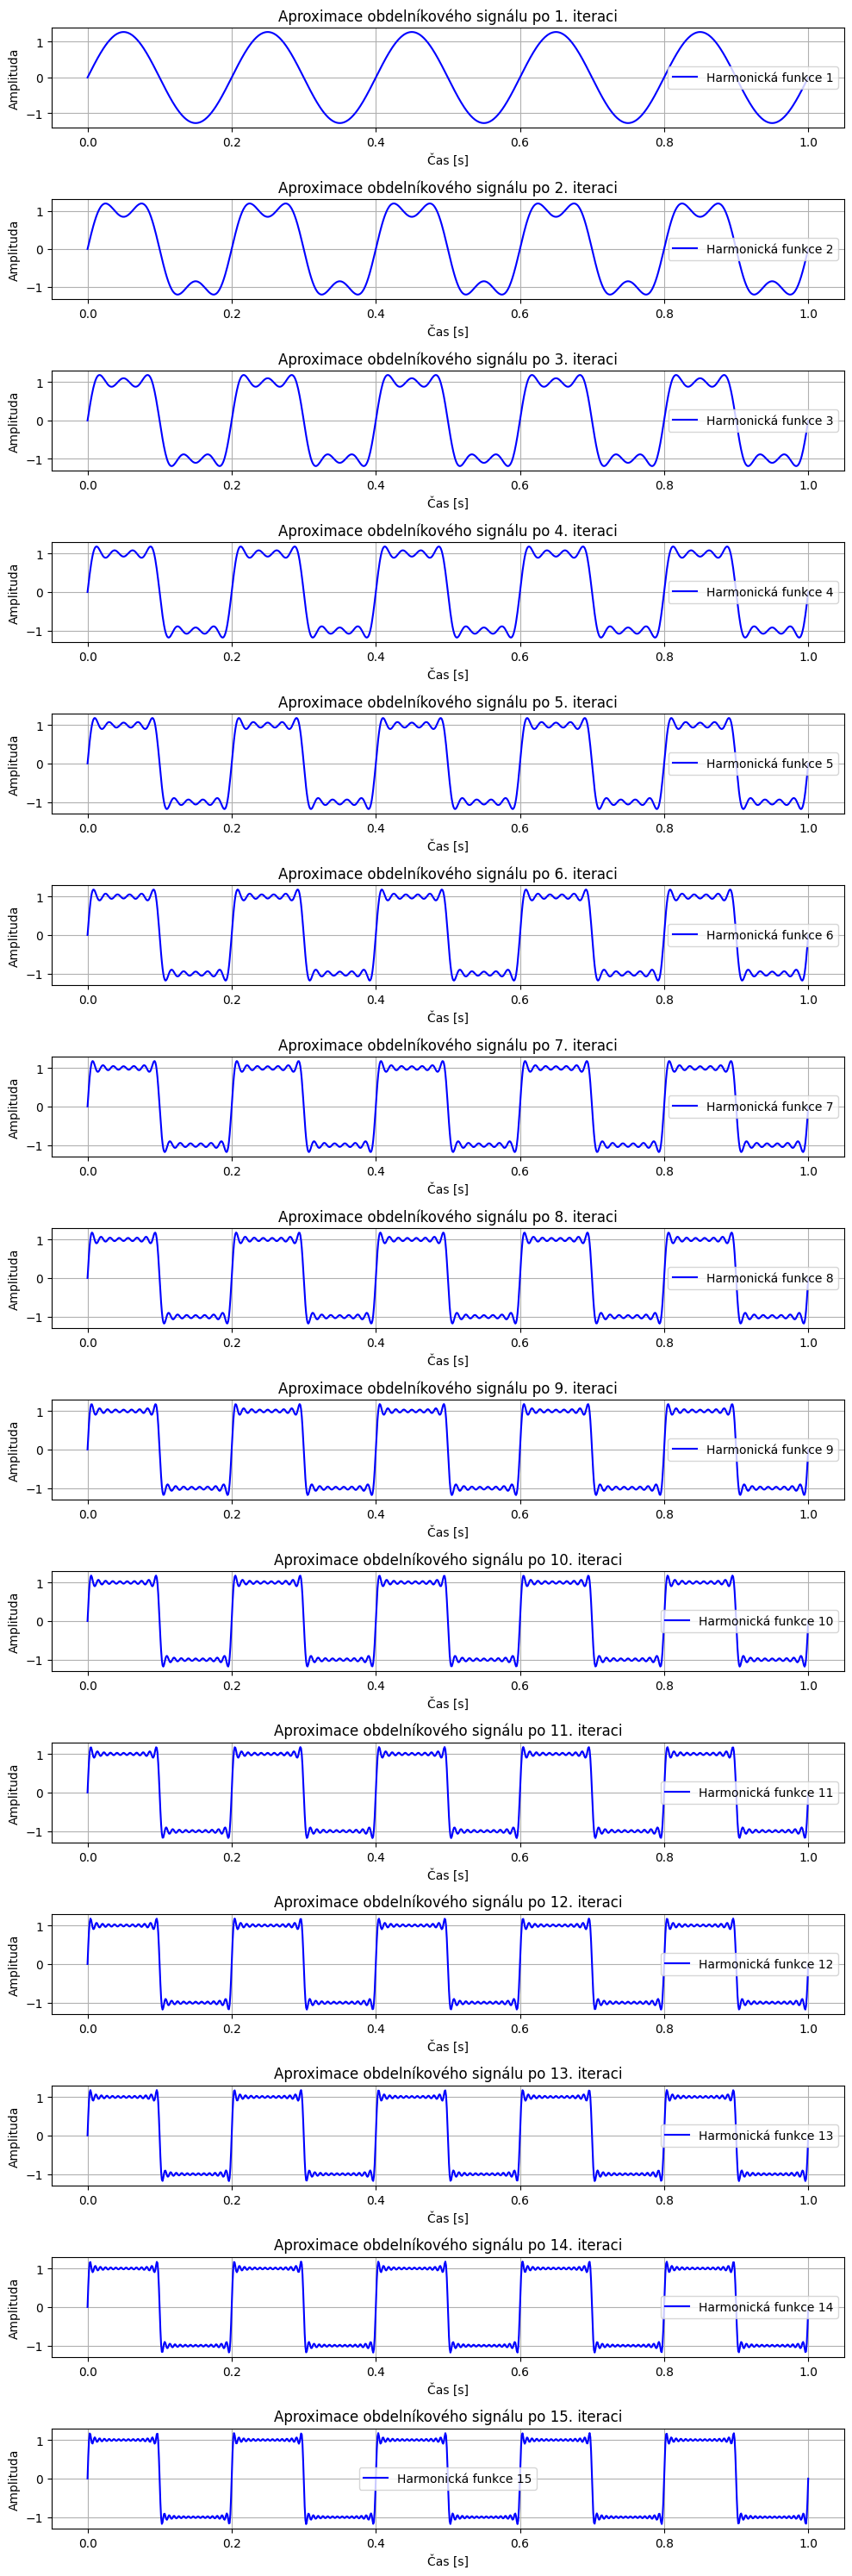

In [31]:
f = 5
t = np.linspace(0, 1, 1000)
signal = np.zeros_like(t)

num_harmonics = 15
fig, axs = plt.subplots(num_harmonics, 1, figsize=(10, 2 * num_harmonics))

for k in range(1, num_harmonics + 1):
    signal += (4 / np.pi) * (np.sin(2 * np.pi * (2 * k - 1) * f * t) / (2 * k - 1))
    axs[k - 1].plot(t, signal, label=f"Harmonická funkce {k}", color="b")
    axs[k - 1].set_title(f"Aproximace obdelníkového signálu po {k}. iteraci")
    axs[k - 1].set_xlabel("Čas [s]")
    axs[k - 1].set_ylabel("Amplituda")
    axs[k - 1].grid(True)
    axs[k - 1].legend()

plt.tight_layout()
plt.show()

[[6.79063538e-06 1.50225167e-05]
 [1.50225167e-05 3.57828823e-05]]


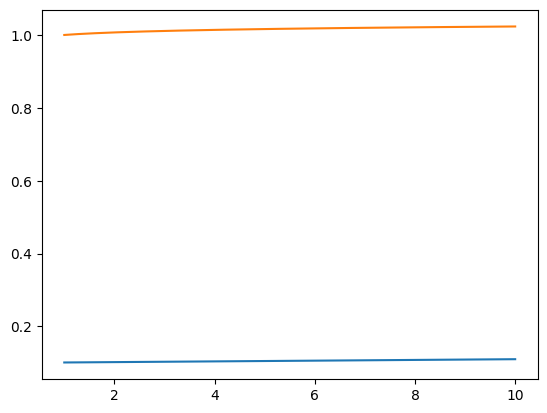

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Vygenerovat si 2 funkce (zkusit si na nich vizualizovat kladnou, zápornou a nulovou kovarianci)


def Fun(a, b, x):
    F = a * x + b
    return np.array(F)


def Fun2(a, b, x):
    F = x**a + b
    return np.array(F)


# Správně?
def cov(X, Y):
    assert len(X) == len(Y)
    n = len(X)
    E_X = np.mean(X)  # střední hodnota X
    E_Y = np.mean(Y)  # střední hodnota Y

    covariance = 0
    for i in range(0, n):
        covariance += (X[i] - E_X) * (Y[i] - E_Y)
    covariance *= 1 / n
    return covariance


# X = [1, 2, 3]
# Y = [1, 2, 3]
# print(cov(X, Y))  # ?
# print(np.cov(X, Y))

# x = np.linspace(-10, 10, 100)
# y = 2 * x

# plt.plot(x, y)
# plt.show()

N = 500
x = np.linspace(1, 10, N)
F1 = Fun(0.001, 0.1, x)
F2 = Fun2(0.01, 0, x)

C = np.cov(F1, F2)
plt.plot(x, F1, x, F2)
print(C)

In [ ]:
# 4 různé signály (pilový, obdelníkový, )
# Vypočtěte kovarianci

          0         1         2
0  0.500000 -0.318306  0.636618
1 -0.318306  0.335324 -0.501990
2  0.636618 -0.501990  1.001988


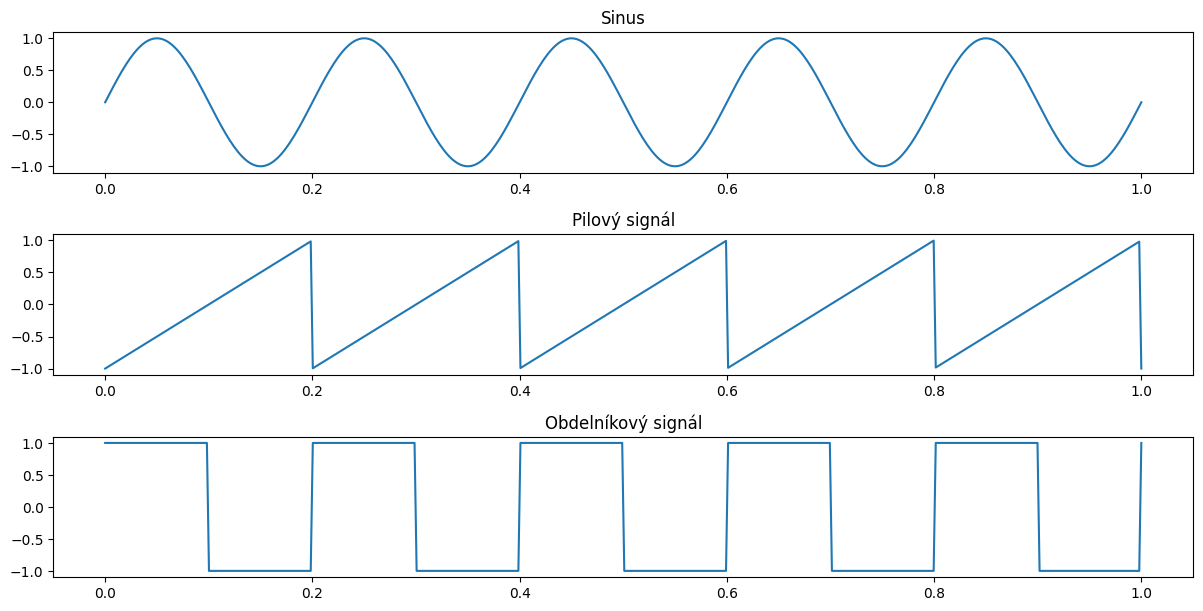

In [60]:
from scipy import signal
import pandas

t = np.linspace(0, 1, 500)

signal_sinus = np.sin(2 * np.pi * 5 * t)
signal_pilovy = signal.sawtooth(2 * np.pi * 5 * t)
signal_obdelnikovy = signal.square(2 * np.pi * 5 * t)

matice_signalu = np.vstack([signal_sinus, signal_pilovy, signal_obdelnikovy])
kovariance = np.cov(matice_signalu)  # co sloupce, to signál
print(pandas.DataFrame(kovariance))

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, signal_sinus)
plt.title("Sinus")

plt.subplot(4, 1, 2)
plt.plot(t, signal_pilovy)
plt.title("Pilový signál")

plt.subplot(4, 1, 3)
plt.plot(t, signal_obdelnikovy)
plt.title("Obdelníkový signál")

plt.tight_layout()
plt.show()

In [ ]:
# Kovariance https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

In [ ]:
# Šum v signálu
# - podíváme se do spektra signálu a šum odstraníme
# - vysokofrekvenční / nízkofrekvenční/ typu pepř a sůl / aditivní šum
# - většinou vysokofrekvenční
#   - zbavuju se ho průměrováním
# -

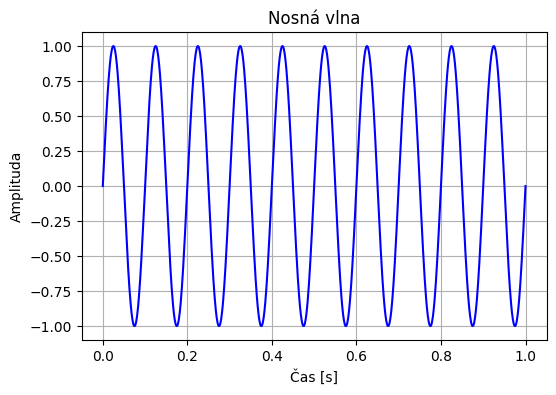

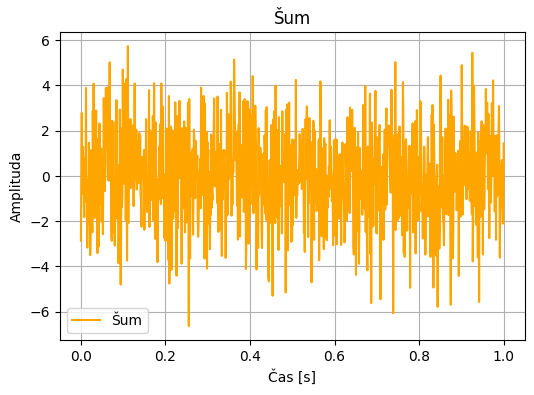

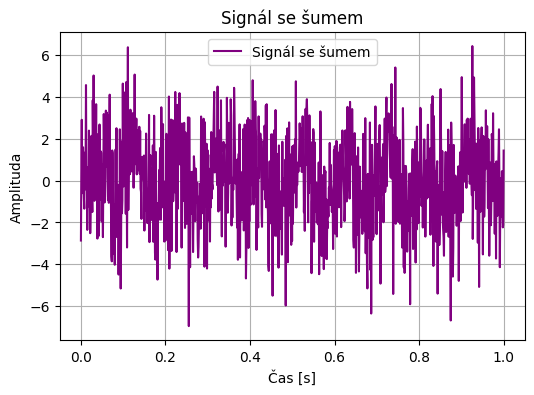

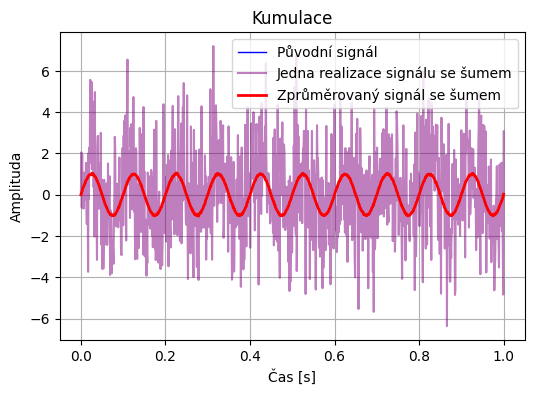

In [57]:
# Vygenerujte signál se šumem, a pak jej restorujte.

# Kumulační techniky závisí na:
# - úroveň šumu
# - na tom, kolik máme period
# - kolik máme vzorků jedné periody


def nosna_vlna(A0, f, tvec):
    # f(t) = A0 * sin(ωt)
    x = A0 * np.sin(2 * np.pi * f * tvec)
    return np.array(x)


A0 = 1
f = 10
t = np.linspace(0, 1, 1000)

signal = nosna_vlna(A0, f, t)
plt.figure(figsize=(6, 4))
plt.plot(t, signal, label="Nosná vlna (f(t))", color="b")
plt.title("Nosná vlna")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

amplituda_sumu = 2
sum = amplituda_sumu * np.random.normal(size=t.size)
plt.figure(figsize=(6, 4))
plt.plot(t, sum, label="Šum", color="orange")
plt.title("Šum")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.show()

signal_se_sumem = signal + sum
plt.figure(figsize=(6, 4))
plt.plot(t, signal_se_sumem, label="Signál se šumem", color="purple")
plt.title("Signál se šumem")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.show()

# Kumulace signálu (TODO: udělat bez for cyklu)
pocet_realizaci_kumulace = 10_000
signaly_se_sumem = []
for _ in range(pocet_realizaci_kumulace):
    sum = amplituda_sumu * np.random.normal(size=t.size)
    signal_se_sumem = signal + sum
    signaly_se_sumem.append(signal_se_sumem)
zprumerovany_signal_se_sumem = np.mean(signaly_se_sumem, axis=0)

plt.figure(figsize=(6, 4))
plt.plot(t, signal, label="Původní signál", color="blue", linewidth=1)
plt.plot(
    t,
    signal_se_sumem,
    label="Jedna realizace signálu se šumem",
    color="purple",
    alpha=0.5,
)
plt.plot(
    t,
    zprumerovany_signal_se_sumem,
    label="Zprůměrovaný signál se šumem",
    color="red",
    linewidth=2,
)
plt.title("Kumulace")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.legend()
plt.grid(True)
plt.show()

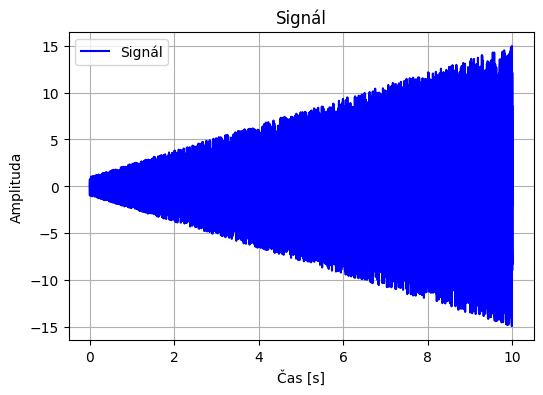

In [67]:
# Předchozí technika pro tento případ fungovat nebude, protože
# šum u takového signálu je proměnlivý (má jinou váhu)


def mojeFsumIncrease(Amp, tvec):
    Ampvals = np.linspace(Amp, Amp * 15, tvec.size)
    Err = Ampvals * (2 * np.random.rand(tvec.size) - 1)
    return np.array(Err)


n_length = 10000
Amp = 0.5

numT = 100
f = 10
A0 = 1.0
T = 1 / f
Tmax = numT * T

tvec = np.linspace(0, Tmax, n_length, endpoint=False)

signal = mojeFsumIncrease(A0, tvec)

plt.figure(figsize=(6, 4))
plt.plot(tvec, signal, label="Signál", color="b")
plt.title("Signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.show()

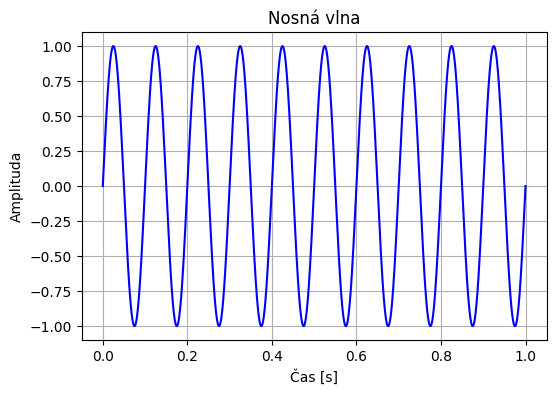

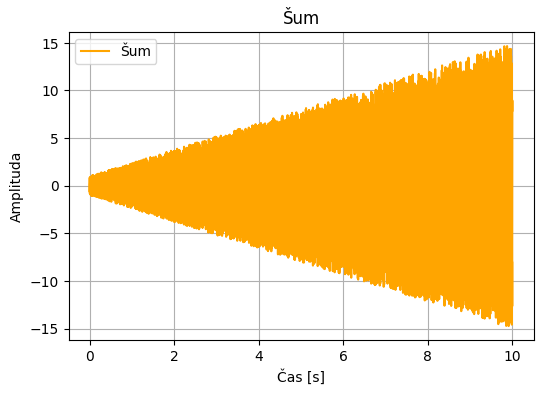

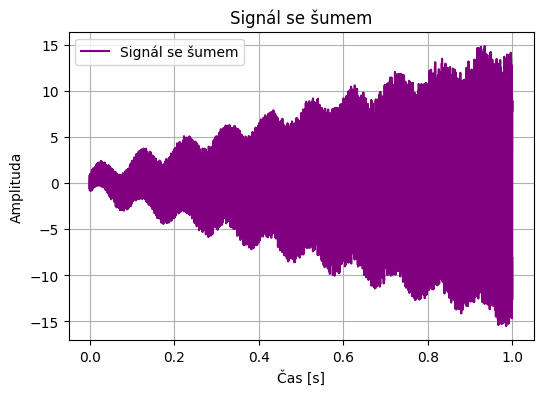

In [75]:
def nosna_vlna(A0, f, tvec):
    # f(t) = A0 * sin(ωt)
    x = A0 * np.sin(2 * np.pi * f * tvec)
    return np.array(x)


def mojeFsumIncrease(Amp, tvec):
    Ampvals = np.linspace(Amp, Amp * 15, tvec.size)
    Err = Ampvals * (2 * np.random.rand(tvec.size) - 1)
    return np.array(Err)


A0 = 1
f = 10
t = np.linspace(0, 1, 10_000)
signal = nosna_vlna(A0, f, t)
plt.figure(figsize=(6, 4))
plt.plot(t, signal, label="Nosná vlna (f(t))", color="b")
plt.title("Nosná vlna")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

n_length = 10_000
Amp = 0.5
numT = 100
f = 10
A0 = 1.0
T = 1 / f
Tmax = numT * T
tvec = np.linspace(0, Tmax, n_length, endpoint=False)
sum = mojeFsumIncrease(A0, tvec)
plt.figure(figsize=(6, 4))
plt.plot(tvec, sum, label="Šum", color="orange")
plt.title("Šum")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.show()

signal_se_sumem = signal + sum
plt.figure(figsize=(6, 4))
plt.plot(t, signal_se_sumem, label="Signál se šumem", color="purple")
plt.title("Signál se šumem")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Nyní jsme dokončili základní techniky zpracování signálu v časové oblasti
# - korelace, konvoluce